<a href="https://colab.research.google.com/github/Laskiri/Machine-Inteligence/blob/main/mi_e22_session5_ffnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
# FFNN implementation in Keras
import numpy as np
from numpy.random import seed
seed(1337)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision, Recall



# Load data
from sklearn.datasets import load_digits
data = load_digits(n_class=10)
X = data.data[:,:32]
y = np.zeros((X.shape[0], 10), dtype=np.int32)
for idx, i in enumerate(data.target):
  y[idx,i]=1

# Making a test split :)
X_test = X[:100]
y_test = y[:100]
X = X[100:]
y = y[100:]

X.shape[0]/10

169.7

In [151]:
# define the keras model
model = Sequential()

# Input Layer
# TODO: You can change the number of neurons in the first layer here - leave the input_shape= as is, though :)
# TODO: You can change the activation here too
model.add(Dense(258,
                input_shape=(32,), # DO NOT CHANGE
                activation='sigmoid'))

# Hidden Layer(s)
# TODO: Add some more here!
# EXAMPLE:
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
# Output Layer
model.add(Dense(10, activation='softmax')) # DO NOT CHANGE


# compile the keras model
model.compile(loss='categorical_crossentropy', # DO NOT CHANGE
              optimizer='adam', # sgd, adam, etc...
              metrics=['accuracy', Precision(), Recall()]) # DO NOT CHANGE

# fit the keras model on the dataset
history = model.fit(X, y, validation_split = 0.1, epochs=15, batch_size=20, shuffle=True)

# evaluate the keras model
results = model.evaluate(X_test, y_test)
accuracy = results[0]
precision = results[1]
recall = results[2]

def fscore(p, r):
  return (2 * p * r) / (p + r)

print('Test Accuracy: %.2f' % (accuracy*100))
print('Test Precision: %.2f' % (precision * 100))
print('Test Recall: %.2f' % (recall * 100))
print('F-score: %.2f' % (fscore(precision, recall) * 100))



Epoch 1/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1391 - loss: 2.3597 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00 - val_accuracy: 0.4118 - val_loss: 2.1208 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 2/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4185 - loss: 2.0059 - precision_9: 0.0000e+00 - recall_9: 0.0000e+00 - val_accuracy: 0.5059 - val_loss: 1.6924 - val_precision_9: 0.0000e+00 - val_recall_9: 0.0000e+00
Epoch 3/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5034 - loss: 1.5826 - precision_9: 0.2692 - recall_9: 0.0039 - val_accuracy: 0.6882 - val_loss: 1.3499 - val_precision_9: 1.0000 - val_recall_9: 0.0824
Epoch 4/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6968 - loss: 1.2320 - precision_9: 0.9722 - recall_9: 0.0999 - val_accuracy: 0.6941 - val_loss: 1.1049 - val_precision_9: 1.0000 - val_recall_9: 0.2000
Epoch 5/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7463 - loss: 0.9613 - precision_9: 0.937

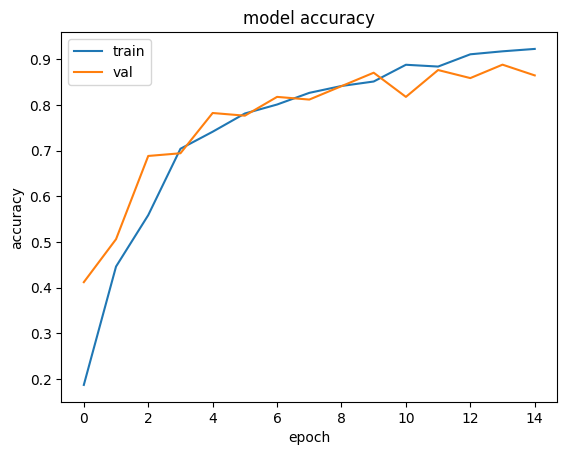

In [152]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()